# Quantum Fourier Transform

Here we implement the Quantum Fourier Transform Algorithm.

In [1]:
import numpy as np
from numpy import pi
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

First we input a value of n for the number of qubits. Here we input n = 3.

In [2]:
n = int(input("Number of qubits = "))

Number of qubits = 3


Below is the circuit for the part of Quantum Fourier Transform before the swapping of qubits, where the order of numbering of qubits in qiskit has been taken into account. The code is written for a variable n.

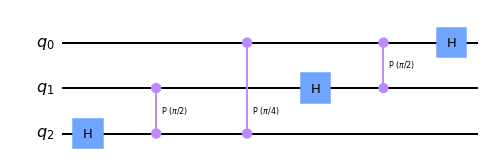

In [3]:
qft = QuantumCircuit(n)
for i in range(n):
    qft.h(n-i-1)
    for j in range(i+1,n):
        qft.cp(pi/2**(j-i),n-i-1,n-j-1)
qft.draw('mpl')

After the first part, the $i$th and $(n-i-1)$th qubits are swapped and the completed circuit for the Quantum Fourier Transform is shown below.

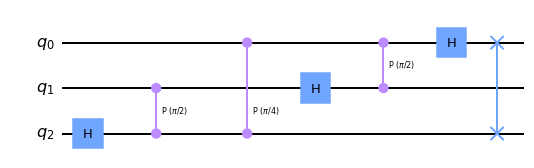

In [4]:
for i in range(n//2):
    qft.swap(i,n-i-1)
qft.draw('mpl')

Now we test the above circuit with different input states and see the corresponding outputs in row vector form as well as bloch sphere representation (when qubits are not entangled). We are dealing with vectors of dimension $2^n=8$.

**INPUT 1:** Standard state $|000\rangle$.

Row vector representation:

In [5]:
state=Statevector.from_int(0,2**n)
state.draw('latex')

<IPython.core.display.Latex object>

Bloch sphere representation:

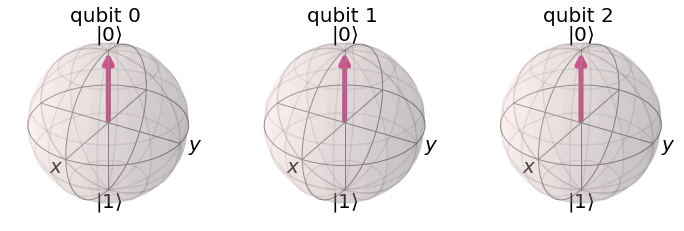

In [6]:
plot_bloch_multivector(state)

**OUTPUT 1:** It outputs the correct state as expected from the actual discrete fourier transform.

Row vector representation:

In [7]:
state=state.evolve(qft)
state.draw('latex')

<IPython.core.display.Latex object>

Bloch sphere representation:

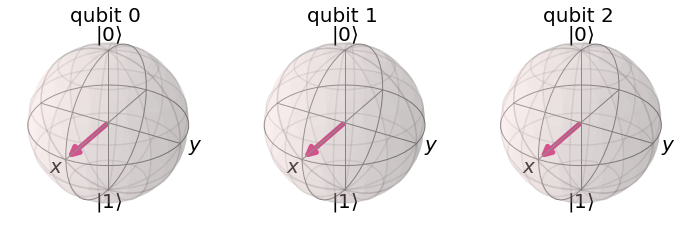

In [8]:
plot_bloch_multivector(state)

**INPUT 2:**

Row vector representation:

In [9]:
state=Statevector.from_int(0,2**n)
qc = QuantumCircuit(n)
qc.x(0)
qc.h(1)
state = state.evolve(qc)
state.draw('latex')

<IPython.core.display.Latex object>

Bloch sphere representation:

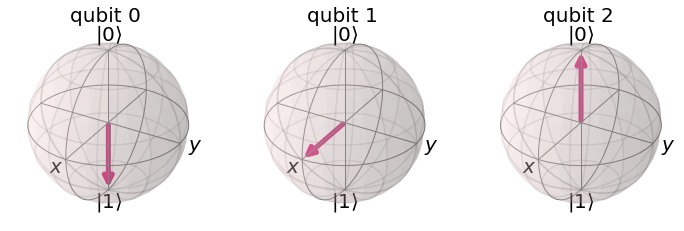

In [10]:
plot_bloch_multivector(state)

**OUTPUT 2:** Matches the expected output.

Row vector representation:

In [11]:
state=state.evolve(qft)
state.draw('latex')

<IPython.core.display.Latex object>

Bloch sphere representation:

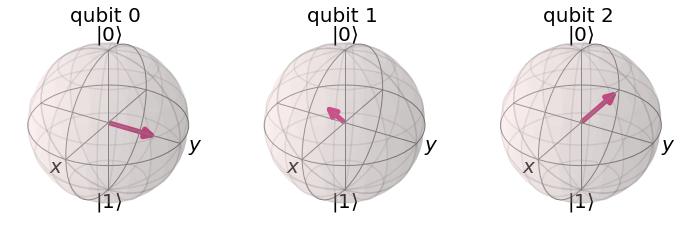

In [12]:
plot_bloch_multivector(state)

Thus we can see that our algorithm implements the Quantum Fourier Transform correctly through our test cases.